<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/melstacorp_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC


In [ ]:
melstacorp_plc_price_df = price_df[price_df['Company Name'] == "MELSTACORP PLC"]

In [ ]:
melstacorp_plc_price_df['Trade Date'] = pd.to_datetime(melstacorp_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-1258568045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melstacorp_plc_price_df['Trade Date'] = pd.to_datetime(melstacorp_plc_price_df['Trade Date']).dt.date


In [ ]:
melstacorp_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name
20082,2025-01-31,134.0,134.0,131.0,131.00,50,258157,3.422593e+07,MELSTACORP PLC
20083,2025-01-30,133.0,135.0,131.5,132.00,71,217601,2.874344e+07,MELSTACORP PLC
20084,2025-01-29,137.0,137.0,133.0,133.00,114,181341,2.435171e+07,MELSTACORP PLC
20085,2025-01-28,137.0,137.0,135.0,137.00,98,76501,1.045879e+07,MELSTACORP PLC
20086,2025-01-27,128.0,140.0,128.0,137.25,294,1320529,1.731374e+08,MELSTACORP PLC
...,...,...,...,...,...,...,...,...,...
21260,2020-01-09,40.0,42.0,39.9,40.00,54,88600,3.553742e+06,MELSTACORP PLC
21261,2020-01-08,41.0,41.0,40.0,40.00,41,179467,7.281274e+06,MELSTACORP PLC
21262,2020-01-07,41.5,41.6,41.0,41.50,16,5697,2.363415e+05,MELSTACORP PLC
21263,2020-01-06,42.0,42.1,41.6,41.60,14,12300,5.162304e+05,MELSTACORP PLC


In [ ]:
import matplotlib.pyplot as plt

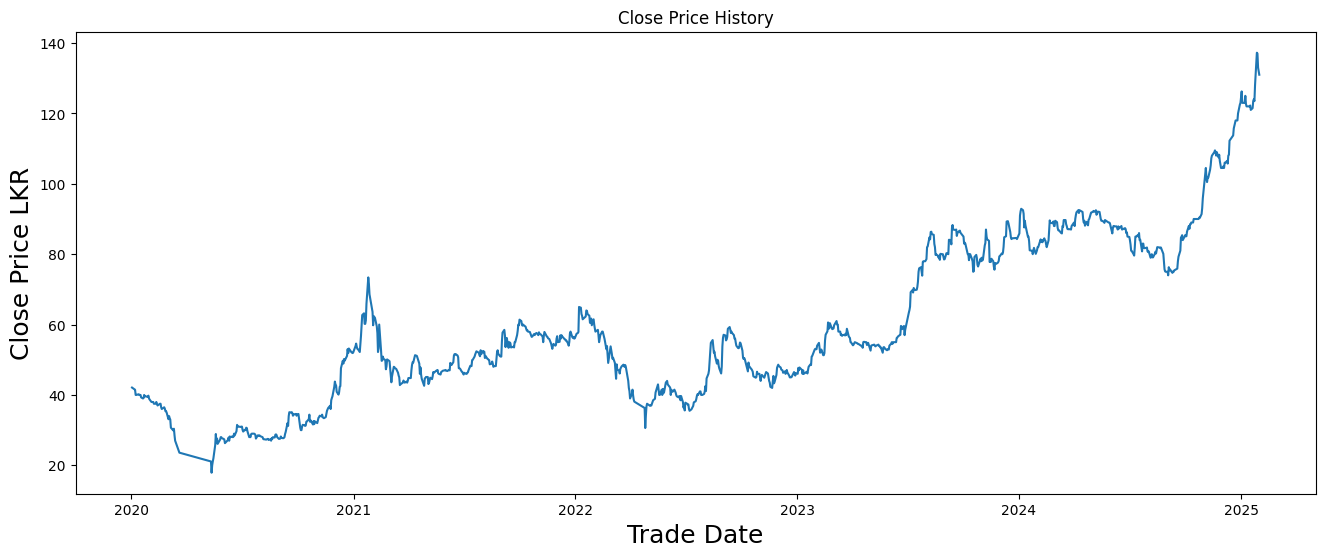

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(melstacorp_plc_price_df['Trade Date'],melstacorp_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = melstacorp_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1124

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.94763301],
       [0.95601173],
       [0.96439045],
       ...,
       [0.19773775],
       [0.19857562],
       [0.20276498]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.94763301, 0.95601173, 0.96439045, 0.99790532, 1.        ,
       0.92249686, 0.88479263, 0.88898199, 0.88479263, 0.86803519,
       0.86384583, 0.87431923, 0.87222455, 0.87222455, 0.87850859,
       0.8973607 , 0.88060327, 0.88060327, 0.88060327, 0.9078341 ,
       0.88060327, 0.87641391, 0.85546711, 0.83870968, 0.83870968,
       0.83870968, 0.81985756, 0.80310013, 0.80100545, 0.79891077,
       0.79681609, 0.79053205, 0.75701718, 0.7549225 , 0.73607038,
       0.74235442, 0.73816506, 0.73816506, 0.72559698, 0.72978634,
       0.72559698, 0.72559698, 0.7339757 , 0.74235442, 0.75701718,
       0.75073314, 0.76330121, 0.7549225 , 0.76330121, 0.76749057,
       0.76330121, 0.7549225 , 0.74863846, 0.73188102, 0.72140762,
       0.70255551, 0.70255551, 0.69208211, 0.70046083, 0.72559698])]
[np.float64(0.6820276497695852)]

[array([0.94763301, 0.95601173, 0.96439045, 0.99790532, 1.        ,
       0.92249686, 0.88479263, 0.88898199, 0.88479263, 0.86803519,
       0.86384583, 0.874

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# # Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - loss: 0.0045
Epoch 2/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - loss: 6.2307e-04
Epoch 3/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - loss: 5.6564e-04
Epoch 4/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - loss: 3.7044e-04
Epoch 5/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - loss: 2.8595e-04
Epoch 6/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - loss: 3.8517e-04
Epoch 7/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 50s 47ms/step - loss: 2.9343e-04
Epoch 8/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - loss: 3.4733e-04
Epoch 9/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - loss: 3.2734e-04
Epoch 10/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 50s 47ms/step - loss: 2.9106e-04
Epoch 11/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - loss: 2.4297e-04
Epoch 12/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - loss: 2.7654e-04
Epoch 13/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - loss: 2.1265e-04
Epoch 14/20
1064/1064 ━━━

In [ ]:
model.save('/content/drive/My Drive/FYP/melstacorp_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


np.float64(1.4097379631126783)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9500436733080889


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


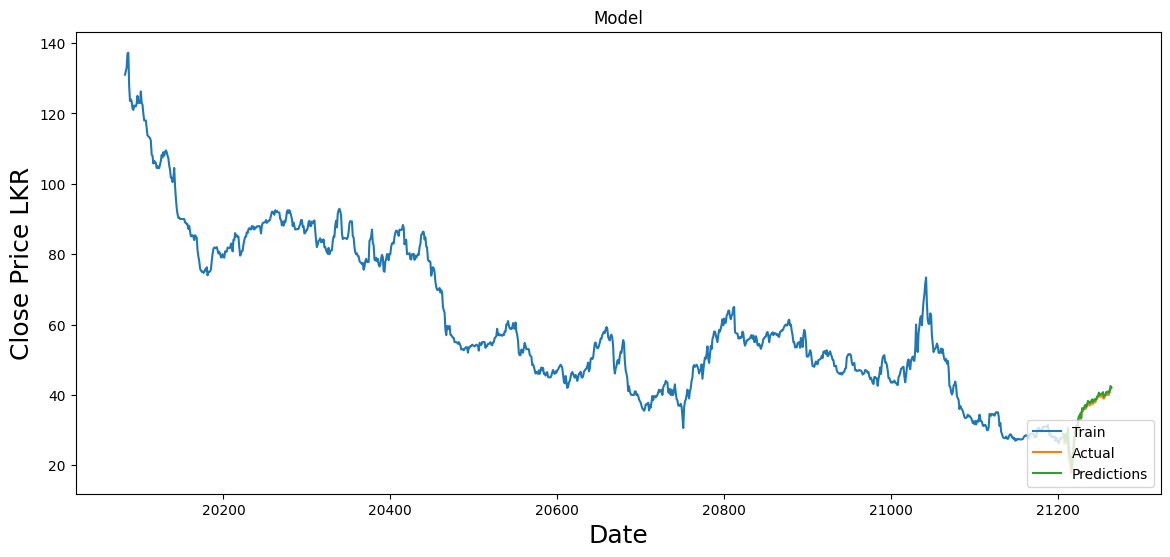

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()